In [39]:
import string

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pyts.datasets import make_cylinder_bell_funnel

In [40]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


def to_sts_matrix(ts: np.array, w: int):
    shape = ts.shape[:-1] + (ts.shape[-1] - w + 1, w)
    strides = ts.strides + (ts.strides[-1],)
    return np.lib.stride_tricks.as_strided(ts, shape=shape, strides=strides)

# kmeans init: 'random' or 'k-means++'
# gmm init_param: 'kmeans' or 'random'
def cluster_functions(feature_matrix: np.array, k: int, algor_name: string):
    if algor_name == 'kmeans':
        return KMeans(n_clusters=k, init='random', n_init=1, max_iter=100).fit(feature_matrix).cluster_centers_

    if algor_name == 'agglo':
        labels = AgglomerativeClustering(n_clusters=k).fit(feature_matrix).labels_
        counts = np.zeros(k)
        centroids = np.zeros((k,feature_matrix.shape[1]))
        for l,v in zip(labels,feature_matrix):
            counts[l] += 1
            centroids[l] += v
        for i in range(k):
            centroids[i] /= counts[i]
        return centroids

    if algor_name == 'gmm':
        return GaussianMixture(n_components=k, max_iter=100, init_params='kmeans').fit(feature_matrix).means_

In [41]:
def create_concatenated_cbf_ts(tss: np.array) -> np.array:
    """

    :param tss: cbf timeseries (shape: [3*n,128])
    :return: concatenated cbf timeseries (shape: [3*n*128])
    """
    return np.ravel(tss)


# Cylinder, Bell & Funnel dataset

In [59]:
cbf,_ = make_cylinder_bell_funnel(n_samples=90)

# cbf_df = pd.DataFrame(cbf.T)
# cbf_df.to_csv(r'..\data\cbf.csv')

In [60]:
n_cbf=30
k_cbf=3
w_cbf=128
cbf_idx_centers=np.arange(0,w_cbf)
print('Number of individual time series: '+str(n_cbf*k_cbf))

cbf_concat = create_concatenated_cbf_ts(cbf)
cbf_sts = to_sts_matrix(cbf_concat,w_cbf)

Number of individual time series: 90


### KMeans centroids (top whole, bottom sts)

<AxesSubplot:>

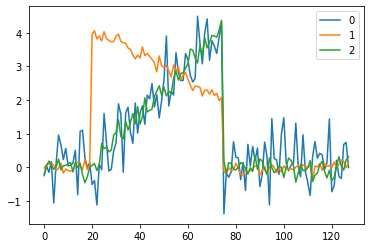

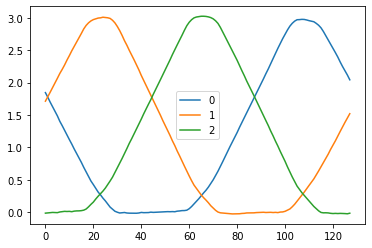

In [61]:
cbf_kmeans_whole_centers = cluster_functions(cbf,k_cbf,'kmeans')
cbf_kmeans_sts_centers = cluster_functions(cbf_sts,k_cbf,'kmeans')

# cbf_concat_df = pd.DataFrame(cbf_concat,np.arange(0,n*k*w))
# cbf_concat_df.plot()
cbf_kmeans_whole_df = pd.DataFrame(cbf_kmeans_whole_centers.T,cbf_idx_centers)
cbf_kmeans_sts_df = pd.DataFrame(cbf_kmeans_sts_centers.T,cbf_idx_centers)
cbf_kmeans_whole_df.plot()
cbf_kmeans_sts_df.plot()

### Agglomerative centroids (top whole, bottom sts)

<AxesSubplot:>

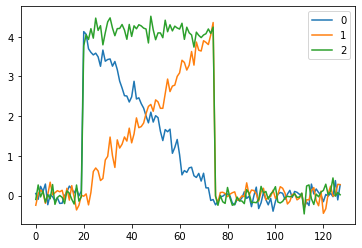

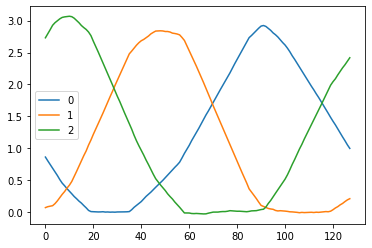

In [62]:
cbf_agglo_whole_centers = cluster_functions(cbf,k_cbf,'agglo')
cbf_agglo_sts_centers = cluster_functions(cbf_sts,k_cbf,'agglo')

cbf_agglo_whole_df = pd.DataFrame(cbf_agglo_whole_centers.T,cbf_idx_centers)
cbf_agglo_sts_df = pd.DataFrame(cbf_agglo_sts_centers.T,cbf_idx_centers)
cbf_agglo_whole_df.plot()
cbf_agglo_sts_df.plot()

### GMM centroids (top whole, bottom sts)

<AxesSubplot:>

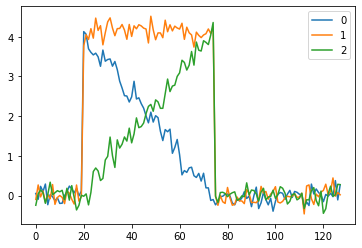

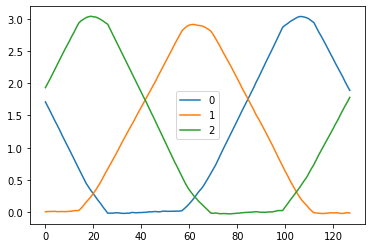

In [63]:
cbf_gmm_whole_centers = cluster_functions(cbf,k_cbf,'gmm')
cbf_gmm_sts_centers = cluster_functions(cbf_sts,k_cbf,'gmm')

cbf_gmm_whole_df = pd.DataFrame(cbf_gmm_whole_centers.T,cbf_idx_centers)
cbf_gmm_sts_df = pd.DataFrame(cbf_gmm_sts_centers.T,cbf_idx_centers)
cbf_gmm_whole_df.plot()
cbf_gmm_sts_df.plot()


# Daily Minimum Temperature Dataset

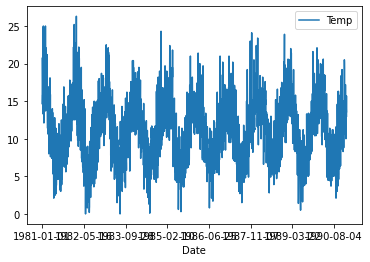

Length: 3650


In [44]:
min_daily_temp = pd.read_csv('../data/daily-minimum-temperatures-in-melbourne.csv',usecols=[0,1])
#min_daily_temp['Temp'] = min_daily_temp['Temp'].apply(pd.to_numeric,errors='coerce')
min_daily_temp.plot(x='Date', y='Temp')
plt.show()
np_min_daily_temp = min_daily_temp['Temp'].to_numpy()
print('Length: '+str(np_min_daily_temp.shape[0]))

In [55]:
k_min = 2
w_min = 182
min_amount_years = np_min_daily_temp.shape[0]//w_min

min_sts_matrix = to_sts_matrix(np_min_daily_temp,w_min)
min_whole_matrix = np.zeros((min_amount_years,w_min))

for i in range(min_amount_years):
    min_whole_matrix[i,:] = np_min_daily_temp[i*w_min:(i+1)*w_min]

### KMeans centroids (top whole, bottom sts)

<AxesSubplot:>

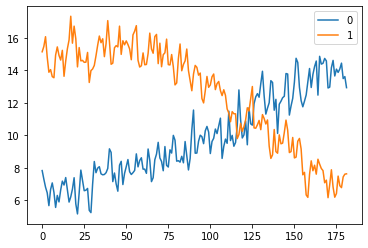

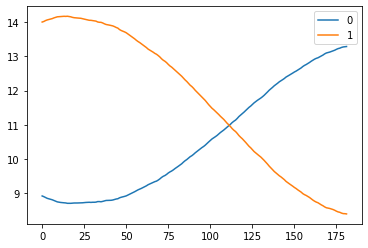

In [56]:
min_kmeans_whole_centers = KMeans(n_clusters=k_min).fit(min_whole_matrix).cluster_centers_
min_kmeans_sts_centers = KMeans(n_clusters=k_min).fit(min_sts_matrix).cluster_centers_

min_idx_centers = np.arange(0,w_min)
min_kmeans_whole_df = pd.DataFrame(min_kmeans_whole_centers.T,min_idx_centers)
min_kmeans_sts_df = pd.DataFrame(min_kmeans_sts_centers.T,min_idx_centers)
min_kmeans_whole_df.plot()
min_kmeans_sts_df.plot()

### Agglomerative centroids (top whole, bottom sts)

<AxesSubplot:>

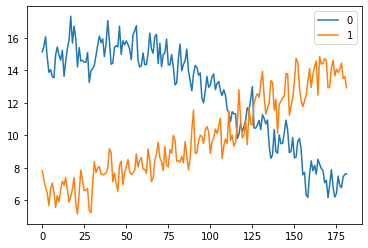

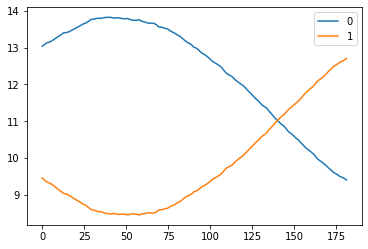

In [57]:
min_agglo_whole_centers = cluster_functions(min_whole_matrix,k_min,'agglo')
min_agglo_sts_centers = cluster_functions(min_sts_matrix,k_min,'agglo')

min_idx_centers = np.arange(0,w_min)
min_agglo_whole_df = pd.DataFrame(min_agglo_whole_centers.T,min_idx_centers)
min_agglo_sts_df = pd.DataFrame(min_agglo_sts_centers.T,min_idx_centers)
min_agglo_whole_df.plot()
min_agglo_sts_df.plot()

### GMM centroids (top whole, bottom sts)

<AxesSubplot:>

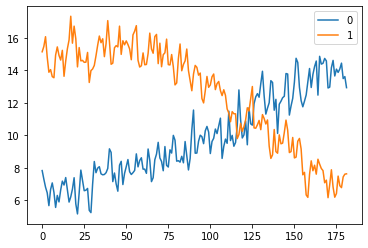

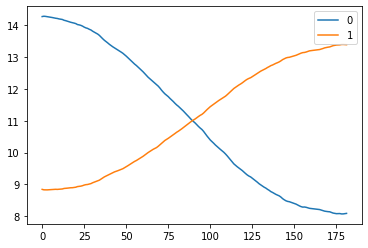

In [58]:
min_gmm_whole_centers = cluster_functions(min_whole_matrix,k_min,'gmm')
min_gmm_sts_centers = cluster_functions(min_sts_matrix,k_min,'gmm')

min_idx_centers = np.arange(0,w_min)
min_gmm_whole_df = pd.DataFrame(min_gmm_whole_centers.T,min_idx_centers)
min_gmm_sts_df = pd.DataFrame(min_gmm_sts_centers.T,min_idx_centers)
min_gmm_whole_df.plot()
min_gmm_sts_df.plot()